In [44]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [41]:
becker2_y, becker2_sr = librosa.load("./data/BECKER-WIEDEMANN_Uli-2_short.wav")
becker6_y, becker6_sr = librosa.load("./data/BECKER-WIEDEMANN_Uli-6_short.wav")
becker2_sr

22050

In [42]:
tempo, beat_frames = librosa.beat.beat_track(y=becker2_y, sr=becker2_sr)

In [43]:
beat_times = librosa.frames_to_time(beat_frames, sr=becker2_sr)
beat_times

array([  0.11609977,   0.55727891,   1.09133787,   1.64861678,
         2.18267574,   2.73995465,   3.32045351,   3.87773243,
         4.41179138,   4.87619048,   5.34058957,   5.82820862,
         6.38548753,   6.89632653,   7.40716553,   7.94122449,
         8.47528345,   8.98612245,   9.56662132,  10.05424036,
        10.54185941,  11.02947846,  11.56353741,  12.07437642,
        12.56199546,  12.97995465,  13.4675737 ,  13.9784127 ,
        14.44281179,  14.93043084,  15.41804989,  15.95210884,
        16.50938776,  17.02022676,  17.48462585,  17.9722449 ,
        18.45986395,  18.94748299,  19.41188209,  19.92272109,
        20.43356009,  20.96761905,  21.47845805,  21.91963719,
        22.36081633,  22.80199546,  23.28961451,  23.82367347,
        24.35773243,  24.86857143,  25.40263039,  25.98312925,
        26.49396825,  27.02802721,  27.4924263 ,  27.93360544,
        28.49088435,  28.95528345,  29.39646259,  29.90730159,
        30.4645805 ,  31.02185941,  31.53269841,  32.04

/tmp/ipykernel_31796/3202790230.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
/tmp/ipykernel_31796/3202790230.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  librosa.display.specshow(chroma_orig[idx], y_axis='chroma')


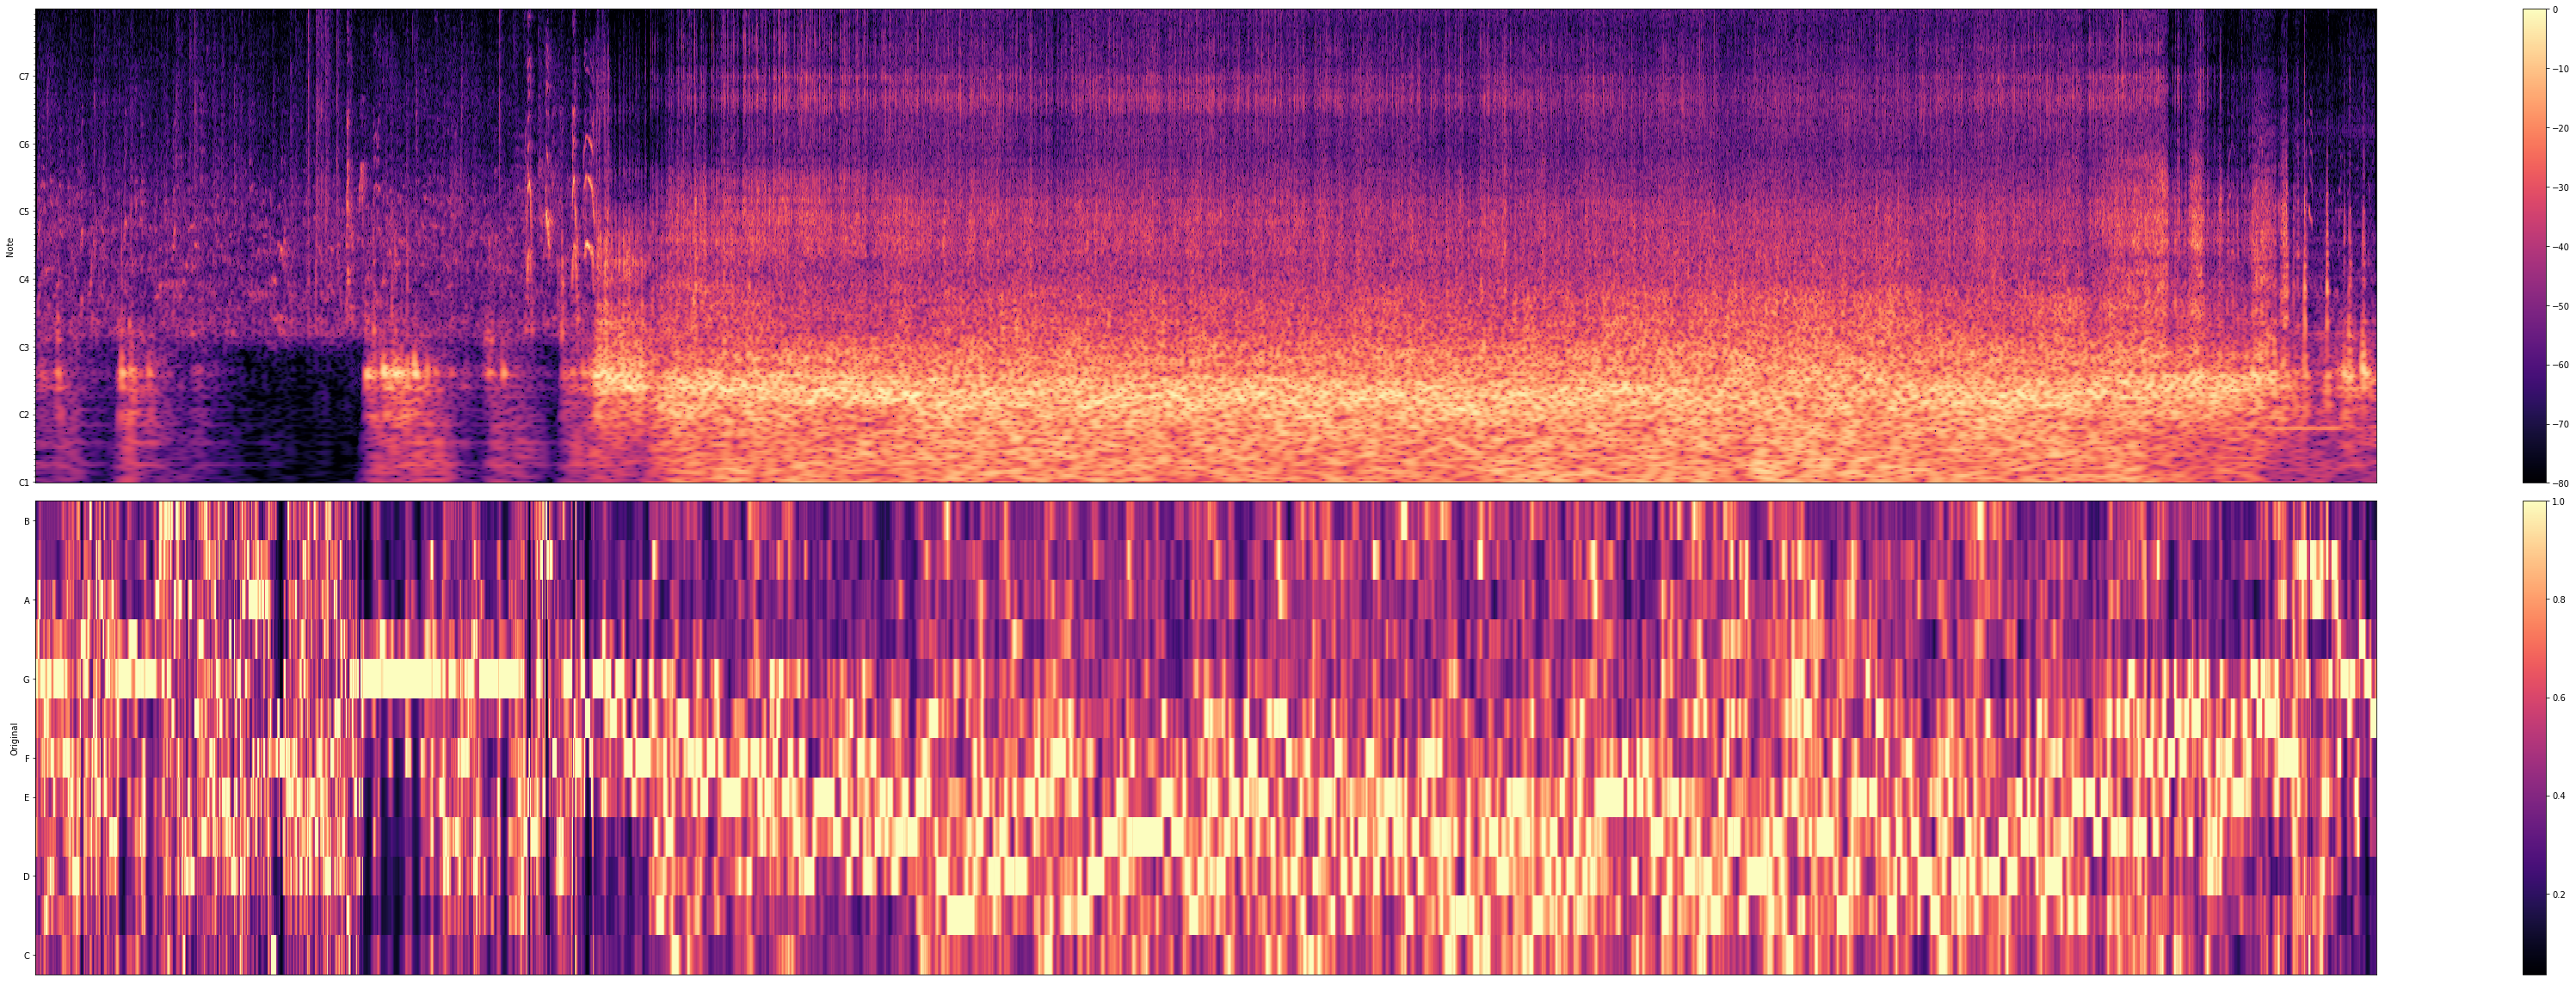

In [49]:
y, sr = librosa.load("./data/BECKER-WIEDEMANN_Uli-2_short.wav")


#######################################
# First, let's plot the original chroma
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)

# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = [slice(None), slice(*list(librosa.time_to_frames([0, len(y)])))]

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))


plt.figure(figsize=(48, 16))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')
plt.tight_layout()